In [3]:
from pathlib import Path

import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import pairwise
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
import matplotlib.pylab as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates

import dmba

%matplotlib inline


no display found. Using non-interactive Agg backend


In [16]:
champ_df = pd.read_excel("/Users/sarathkumarvatyam/Downloads/IMB881-XLS-ENG .xlsx" )

In [17]:
champ_df.columns

Index(['OrderType', 'OrderCategory', 'CustomerCode', 'CountryName',
       'CustomerOrderNo', 'Custorderdate', 'UnitName', 'QtyRequired',
       'TotalArea', 'Amount', 'ITEM_NAME', 'QualityName', 'DesignName',
       'ColorName', 'ShapeName', 'AreaFt'],
      dtype='object')

In [18]:
# Display the first few rows of the DataFrame
print(champ_df.head())

# Get general information about the DataFrame
print(champ_df.info())


   OrderType OrderCategory CustomerCode CountryName CustomerOrderNo  \
0  Area Wise         Order          H-1         USA         1873354   
1  Area Wise         Order          H-1         USA         1873354   
2  Area Wise         Order          H-1         USA         1873354   
3  Area Wise         Order          H-1         USA         1918436   
4  Area Wise         Order          H-1         USA         1873354   

  Custorderdate UnitName  QtyRequired  TotalArea  Amount    ITEM_NAME  \
0    2017-01-16       Ft            2       6.00   12.00  HAND TUFTED   
1    2017-01-16       Ft            2       9.00   18.00  HAND TUFTED   
2    2017-01-16       Ft            2      54.00  108.00  HAND TUFTED   
3    2017-02-01       Ft            5      54.00  270.00  HAND TUFTED   
4    2017-01-16       Ft            5      71.25  356.25  HAND TUFTED   

             QualityName         DesignName ColorName ShapeName  AreaFt  
0  TUFTED 30C HARD TWIST  OLD LONDON [3715]     BEIGE       

In [49]:
# Display summary statistics of numeric columns
print(champ_df.describe())


       Sum of QtyRequired  Sum of TotalArea  Sum of Amount          DURRY  \
count           45.000000         45.000000   4.500000e+01      45.000000   
mean         12977.555556      13056.589847   6.982099e+05    7103.000000   
std          30550.741969      34474.177202   1.808977e+06   22160.531083   
min              2.000000          1.350000   3.288752e+02       0.000000   
25%            565.000000        376.769000   3.970124e+04       0.000000   
50%           1566.000000       2120.000000   1.167783e+05     289.000000   
75%          11146.000000       8451.562500   4.266260e+05    1560.000000   
max         183206.000000     209725.222000   1.134105e+07  139618.000000   

          HANDLOOM  DOUBLE BACK    JACQUARD   HAND TUFTED    HAND WOVEN  \
count    45.000000    45.000000   45.000000     45.000000     45.000000   
mean    185.533333   407.911111   89.422222   3650.844444    867.688889   
std     607.655091  1166.855094  175.796821   9917.428493   2418.324334   
min   

In [50]:
# Check for missing values
print(champ_df.isnull().sum())


Sum of QtyRequired    0
Sum of TotalArea      0
Sum of Amount         0
DURRY                 0
HANDLOOM              0
DOUBLE BACK           0
JACQUARD              0
HAND TUFTED           0
HAND WOVEN            0
KNOTTED               0
GUN TUFTED            0
Powerloom Jacquard    0
INDO TEBETAN          0
dtype: int64


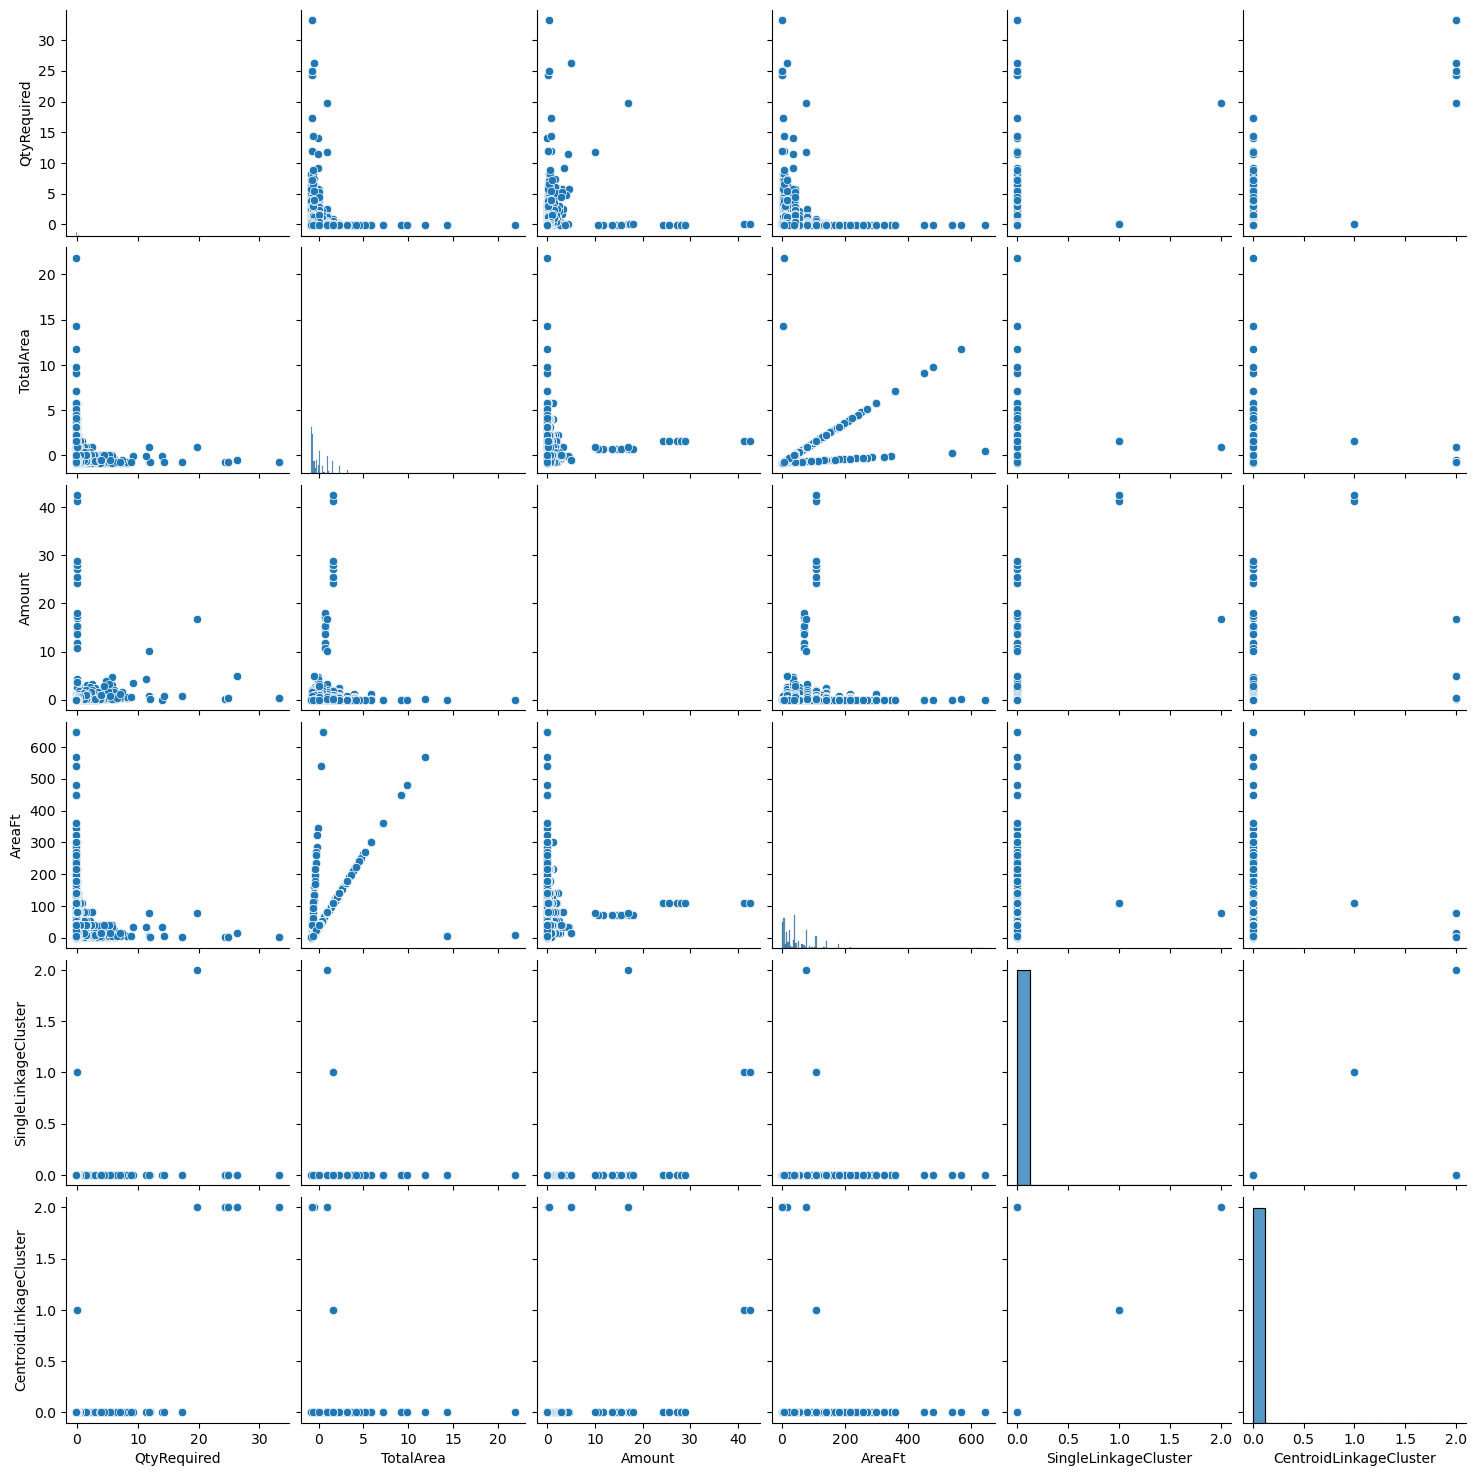

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pair plot for numerical columns
sns.pairplot(champ_df)
plt.show()


/var/folders/yk/5_j261dd7f35t_7lh1znk99r0000gn/T/ipykernel_8051/1889483633.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = champ_df.corr()


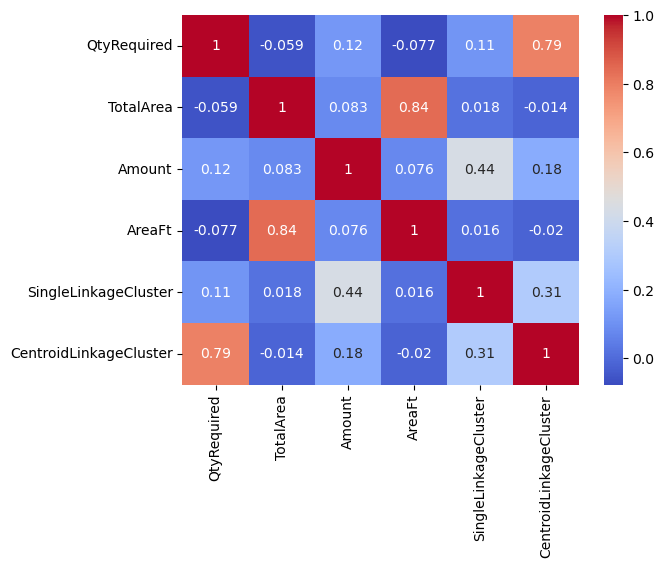

In [24]:
# Correlation heatmap
correlation_matrix = champ_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


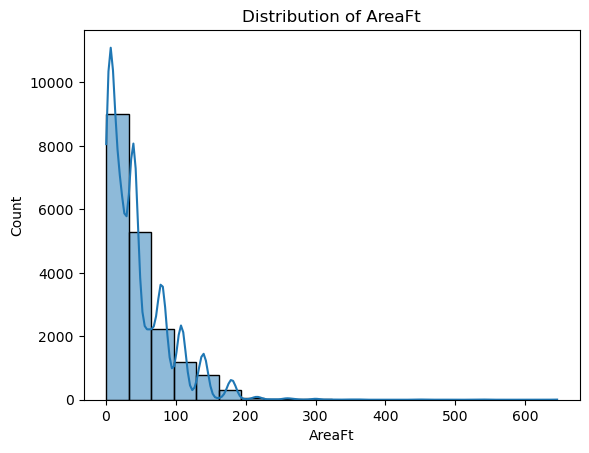

In [25]:
# Distribution of a numerical column (e.g., 'AreaFt')
sns.histplot(champ_df['AreaFt'], bins=20, kde=True)
plt.title('Distribution of AreaFt')
plt.show()


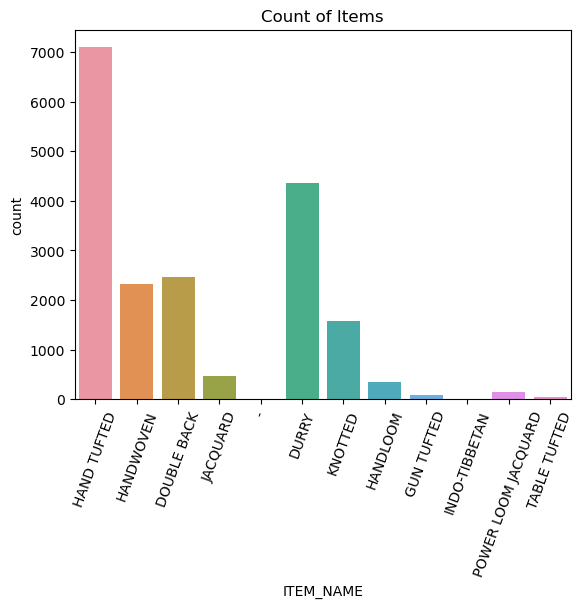

In [26]:
# Count of values in a categorical column 
sns.countplot(x='ITEM_NAME', data=champ_df)
plt.title('Count of Items')
plt.xticks(rotation=70)
plt.show()


In [27]:
# Unique values in a categorical column 
print(champ_df['ITEM_NAME'].unique())


['HAND TUFTED' 'HANDWOVEN' 'DOUBLE BACK' 'JACQUARD' '-' 'DURRY' 'KNOTTED'
 'HANDLOOM' 'GUN TUFTED' 'INDO-TIBBETAN' 'POWER LOOM JACQUARD'
 'TABLE TUFTED']


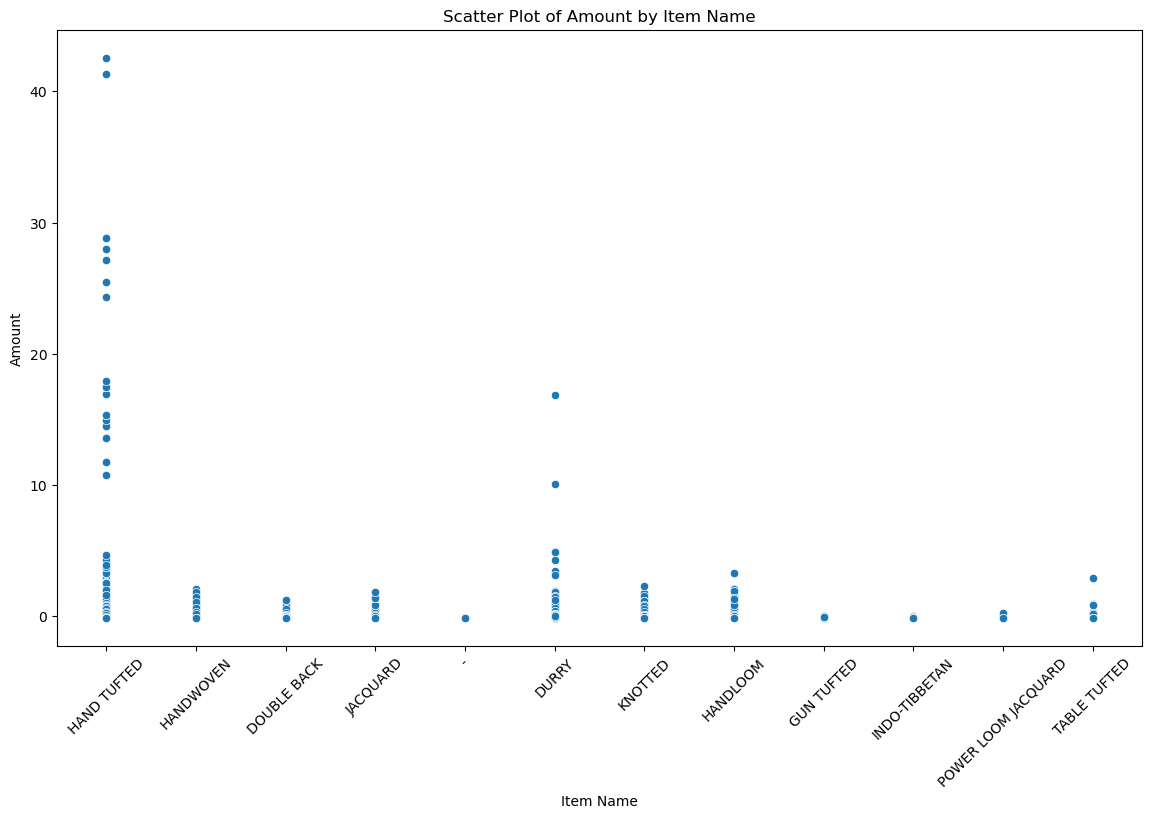

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))
sns.scatterplot(x='ITEM_NAME', y='Amount', data=champ_df)
plt.title('Scatter Plot of Amount by Item Name')
plt.xlabel('Item Name')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.show()


In [56]:
import pandas as pd

# Assuming champ_df is your DataFrame with the sheet "Raw Data-Order and Sample"
# If you haven't loaded your data yet, you might want to read it from an Excel file.
# Replace 'your_data.xlsx' with the actual file path or connection method.
champ_df = pd.read_excel('/Users/sarathkumarvatyam/Downloads/IMB881-XLS-ENG .xlsx', sheet_name='Raw Data-Order and Sample')

# Display the first few rows of the "Raw Data-Order and Sample" sheet
print(champ_df.head())

# Check the column names
print(champ_df.columns)

# Calculate average amount with respect to other attributes
average_amount_by_country = champ_df.groupby('CountryName')['Amount'].mean()
average_amount_by_item = champ_df.groupby('ITEM_NAME')['Amount'].mean()
average_amount_by_quality = champ_df.groupby('QualityName')['Amount'].mean()
average_amount_by_design = champ_df.groupby('DesignName')['Amount'].mean()
average_amount_by_color = champ_df.groupby('ColorName')['Amount'].mean()
average_amount_by_shape = champ_df.groupby('ShapeName')['Amount'].mean()

# Display the results
print("\nAverage Amount by Country:\n", average_amount_by_country)
print("\nAverage Amount by Item:\n", average_amount_by_item)
print("\nAverage Amount by Quality:\n", average_amount_by_quality)
print("\nAverage Amount by Design:\n", average_amount_by_design)
print("\nAverage Amount by Color:\n", average_amount_by_color)
print("\nAverage Amount by Shape:\n", average_amount_by_shape)



   OrderType OrderCategory CustomerCode CountryName CustomerOrderNo  \
0  Area Wise         Order          H-1         USA         1873354   
1  Area Wise         Order          H-1         USA         1873354   
2  Area Wise         Order          H-1         USA         1873354   
3  Area Wise         Order          H-1         USA         1918436   
4  Area Wise         Order          H-1         USA         1873354   

  Custorderdate UnitName  QtyRequired  TotalArea  Amount    ITEM_NAME  \
0    2017-01-16       Ft            2       6.00   12.00  HAND TUFTED   
1    2017-01-16       Ft            2       9.00   18.00  HAND TUFTED   
2    2017-01-16       Ft            2      54.00  108.00  HAND TUFTED   
3    2017-02-01       Ft            5      54.00  270.00  HAND TUFTED   
4    2017-01-16       Ft            5      71.25  356.25  HAND TUFTED   

             QualityName         DesignName ColorName ShapeName  AreaFt  
0  TUFTED 30C HARD TWIST  OLD LONDON [3715]     BEIGE       

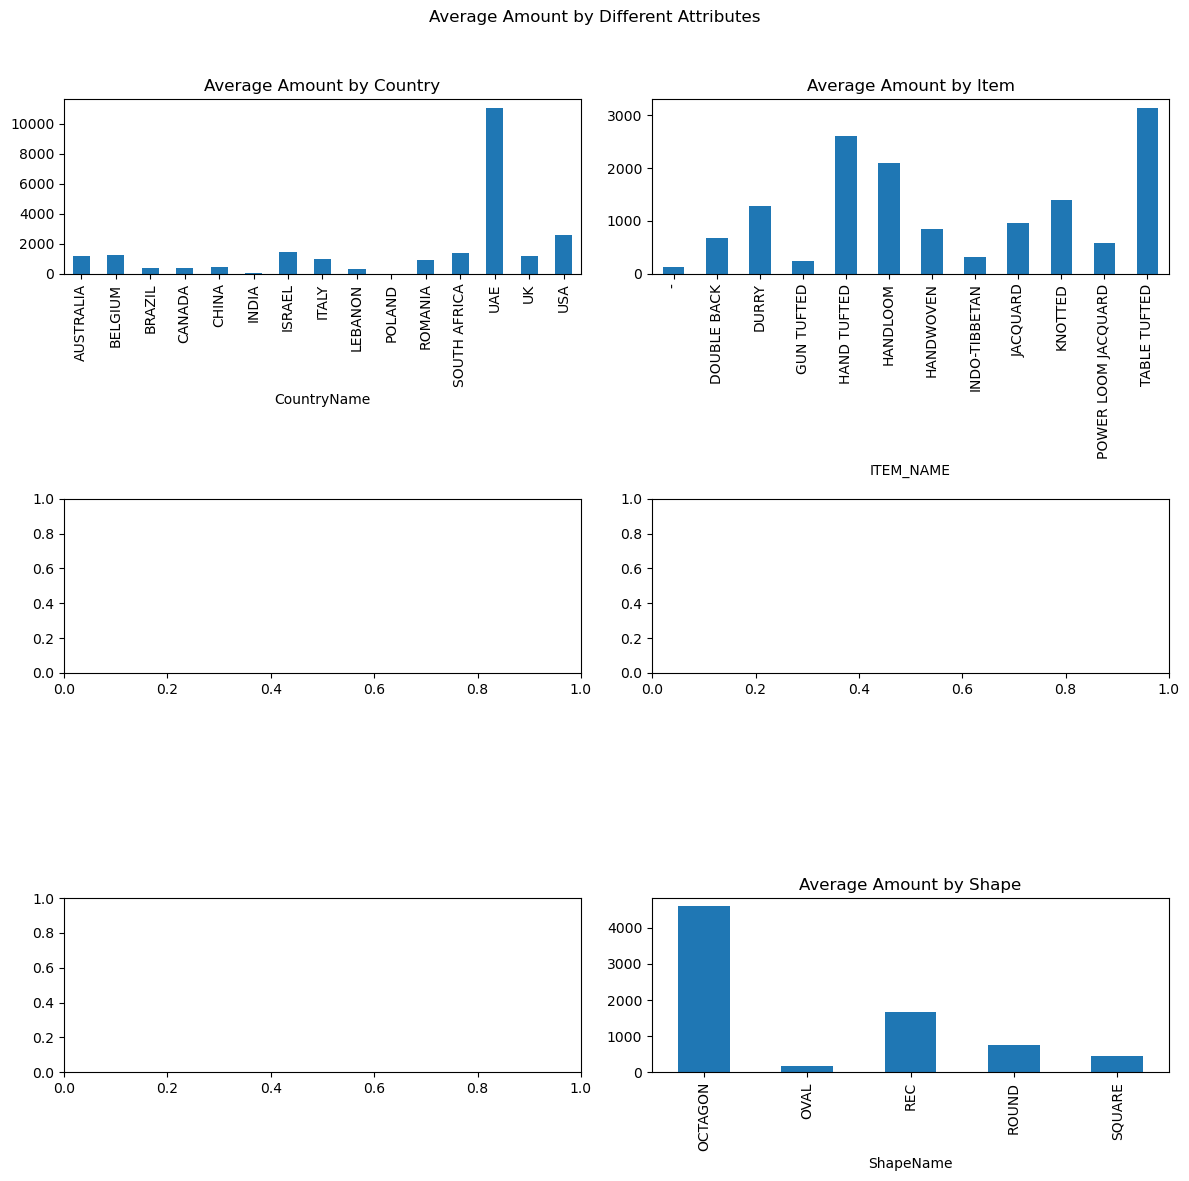

In [65]:
import pandas as pd
import matplotlib.pyplot as plt


champ_df = pd.read_excel('/Users/sarathkumarvatyam/Downloads/IMB881-XLS-ENG .xlsx', sheet_name='Raw Data-Order and Sample')

# Calculate average amount with respect to other attributes
average_amount_by_country = champ_df.groupby('CountryName')['Amount'].mean()
average_amount_by_item = champ_df.groupby('ITEM_NAME')['Amount'].mean()
average_amount_by_quality = champ_df.groupby('QualityName')['Amount'].mean()
average_amount_by_design = champ_df.groupby('DesignName')['Amount'].mean()
average_amount_by_color = champ_df.groupby('ColorName')['Amount'].mean()
average_amount_by_shape = champ_df.groupby('ShapeName')['Amount'].mean()

# Plotting
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
fig.suptitle('Average Amount by Different Attributes')

# Plot by Country
average_amount_by_country.plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_title('Average Amount by Country')

# Plot by Item
average_amount_by_item.plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_title('Average Amount by Item')

# Plot by Shape
average_amount_by_shape.plot(kind='bar', ax=axes[2, 1])
axes[2, 1].set_title('Average Amount by Shape')

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to prevent clipping of suptitle
plt.show()


              Amount                                                 \
ShapeName    OCTAGON   OVAL           REC        ROUND       SQUARE   
CountryName                                                           
AUSTRALIA        NaN    NaN   1145.072412  1199.828667          NaN   
BELGIUM          NaN    NaN   1223.722450  2298.505000  2457.600000   
BRAZIL           NaN    NaN    363.279420          NaN   342.000000   
CANADA           NaN    NaN    406.893031          NaN          NaN   
CHINA            NaN    NaN    437.064370     7.290000          NaN   
INDIA            NaN    NaN     36.054239     0.000000     0.571429   
ISRAEL           NaN    NaN   1427.406267          NaN          NaN   
ITALY            NaN    NaN   1043.940223   573.663608   201.896875   
LEBANON          NaN    NaN    356.433270     7.760000          NaN   
POLAND           NaN    NaN      0.000000          NaN          NaN   
ROMANIA          NaN    NaN    966.011032   518.430968          NaN   
SOUTH 

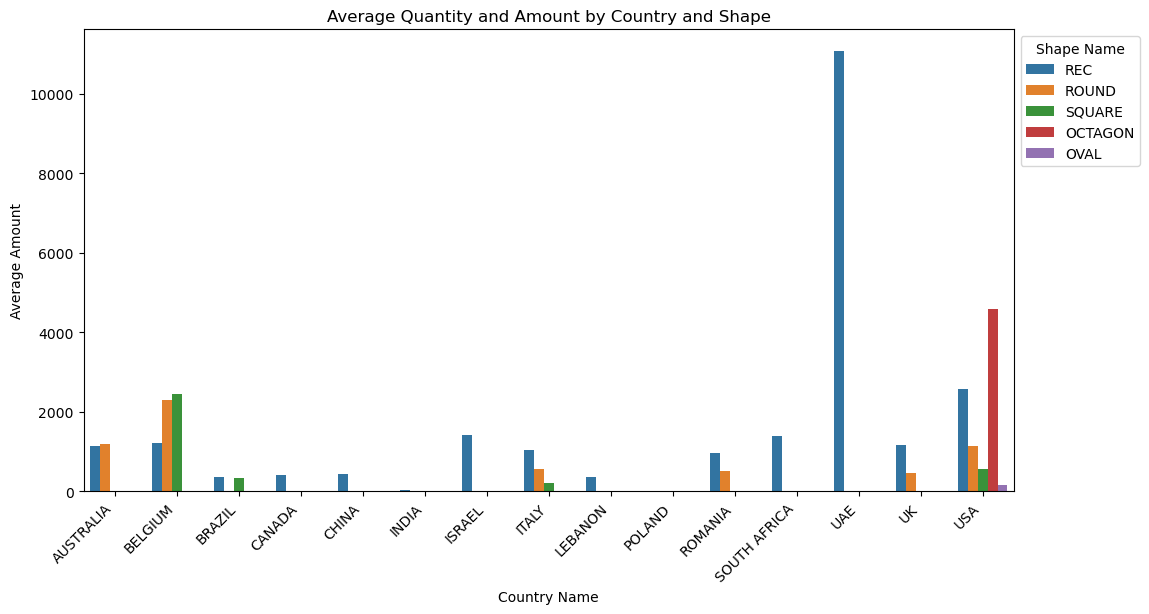

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for better aesthetics

# Assuming champ_df is your DataFrame with the sheet "Raw Data-Order and Sample"
# If you haven't loaded your data yet, you might want to read it from an Excel file.
# Replace 'your_data.xlsx' with the actual file path or connection method.
champ_df = pd.read_excel('/Users/sarathkumarvatyam/Downloads/IMB881-XLS-ENG .xlsx', sheet_name='Raw Data-Order and Sample')

# Calculate average quantity and amount by Country and Shape
average_quantity_amount = champ_df.groupby(['CountryName', 'ShapeName']).agg({'QtyRequired': 'mean', 'Amount': 'mean'}).reset_index()

# Create a pivot table for better tabular representation
pivot_table = pd.pivot_table(average_quantity_amount, values=['QtyRequired', 'Amount'], index='CountryName', columns='ShapeName', aggfunc='mean')

# Display the pivot table
print(pivot_table)

# Optionally, you can also save it to an Excel file
# pivot_table.to_excel('output_table.xlsx')

# Plotting using seaborn for better aesthetics
plt.figure(figsize=(12, 6))
sns.barplot(x='CountryName', y='Amount', hue='ShapeName', data=average_quantity_amount)

plt.title('Average Quantity and Amount by Country and Shape')
plt.ylabel('Average Amount')
plt.xlabel('Country Name')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Shape Name', bbox_to_anchor=(1, 1))
plt.show()
